In [1]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from IPython import display
import seaborn as sn
from sklearn.metrics import confusion_matrix,f1_score,precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
import pandas as pd

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/emerging-technologies/Assignment-01

/content/drive/MyDrive/emerging-technologies/Assignment-01


In [6]:
df2 = pd.read_csv('WESAD/user2.csv', header = None)
df3 = pd.read_csv('WESAD/user3.csv', header = None)
df4 = pd.read_csv('WESAD/user4.csv', header = None)
df5 = pd.read_csv('WESAD/user5.csv', header = None)
df6 = pd.read_csv('WESAD/user6.csv', header = None)

In [7]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,-0.874131,-0.830702,-0.780308,-0.769246,-0.777440,-0.799565,-0.838897,-0.886832,-0.953205,-1.030640,...,-0.096506,-0.103881,-0.110436,-0.102242,-0.085854,-0.045703,0.018212,0.073113,0.120639,0
1,0.161200,0.175540,0.151777,0.107118,0.047711,-0.012926,-0.069466,-0.090770,-0.093229,-0.101013,...,-0.916331,-0.914693,-0.903630,-0.857333,-0.797926,-0.745483,-0.718443,-0.706971,-0.723359,0
2,-0.763101,-0.807759,-0.834800,-0.852827,-0.867986,-0.850368,-0.783996,-0.715984,-0.650021,-0.585288,...,0.069016,0.107938,0.120639,0.124736,0.127604,0.114083,0.089501,0.057134,0.007969,0
3,-0.042015,-0.057994,-0.053077,-0.017023,0.031323,0.082946,0.135388,0.155874,0.163248,0.144402,...,0.141534,0.109167,0.089501,0.050169,-0.005551,-0.014155,0.000594,0.045253,0.087043,0
4,0.128014,0.193976,0.258301,0.295174,0.293535,0.262398,0.212413,0.159151,0.098515,0.053447,...,-1.437070,-1.522289,-1.572683,-1.611605,-1.624716,-1.624716,-1.610786,-1.596856,-1.577190,0


In [8]:
data = pd.concat([df2, df3, df4, df5, df6])

In [9]:
data.shape

(29689, 257)

In [10]:
data[256].value_counts()

,count
256,
1,15912
2,8707
0,5070


<Axes: >

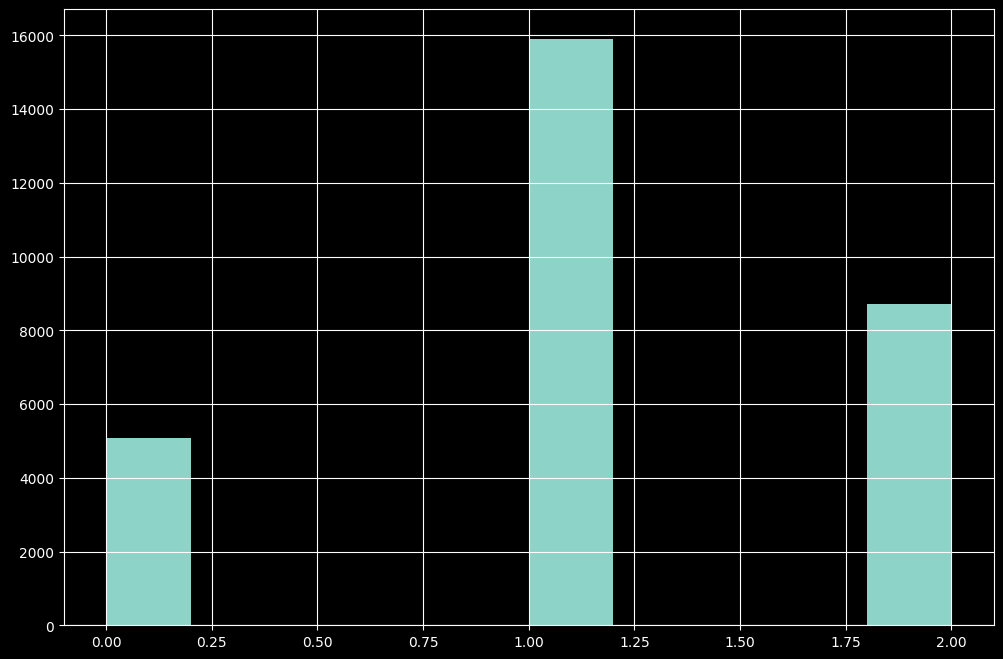

In [11]:
plt.figure(figsize = (12,8))
data[256].hist()

In [12]:
X = data[data.columns[0:-1]].values
y = data[data.columns[-1]].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform to Tensor and Using DataLoader

In [14]:
# Convert to tensor
train_data = torch.tensor(X_train, dtype = torch.float32 )
train_labels = torch.tensor(y_train, dtype = torch.long)
test_data = torch.tensor(X_test, dtype = torch.float32 )
test_labels = torch.tensor(y_test, dtype = torch.long)


# Convert to PyTorch Datasets
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

# Step 4: translate into dataloader objects
batchsize    = 32
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=batchsize, drop_last=True)

# Observe the batches of training and test data

In [15]:
for x,y in train_loader:
    break
print(x.shape)
print(y.shape)

torch.Size([32, 256])
torch.Size([32])


In [16]:
print(y)

tensor([1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1, 1, 2, 2, 2, 1,
        1, 1, 0, 1, 2, 2, 1, 2])


In [17]:
for x,y in test_loader:
    break
print(x.shape)
print(y.shape)

torch.Size([32, 256])
torch.Size([32])


# Creating the Neural Network Model

### I added dropdout with prob 0.1 to try to improve the accuracy

In [68]:
class NN_Classifier(nn.Module):
  def __init__(self):
    super().__init__()

    self.input = nn.Linear(256,512)
    self.fc1 = nn.Linear(512,256)
    self.dropout = nn.Dropout(0.1)
    self.fc2 = nn.Linear(256,128)
    self.dropout = nn.Dropout(0.1)
    self.fc3 = nn.Linear(128,64)
    self.dropout = nn.Dropout(0.1)

    # Classification OR  output layer
    self.output = nn.Linear(64,3)

  # Forward pass
  def forward(self,x):
    # Pass the data through the input layer
    x = self.input(x)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.relu(x)

    # output layer

    x = self.output(x)
    # X = torch.sigmoid
    return x

In [69]:
model = NN_Classifier()

# change the epoch to 101 ot have better accuracy

In [70]:
epochs = 101

lossfunc = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), momentum = 0.9, lr = 0.001)


model.to(device) # placing a model on GPU

# Initialize losses and Accuracies

losses    = torch.zeros(epochs)
trainAcc  = []
testAcc   = []


# For Loop for epochs

for epoch in range(epochs):
 model.train()

 # Loop for training in batches

 batchAcc  = []
 batchLoss = []

 for X,y in train_loader:

  X = X.to(device) # Placing features on device
  y = y.to(device) # placing labels on device

  ypred = model(X)
  loss = lossfunc(ypred,y)

# Backpropagation

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Append batchloss

  batchLoss.append(loss.item())

  ypred = ypred.cpu() # Back to cpu
  y = y.cpu()

  # compute batch accuracy

  acc = 100 * torch.mean((torch.argmax(ypred, dim=1) == y).float())
  batchAcc.append(acc)

# Batch loop concluded

# Average training accuracy (Outside the batchloop)

 trainAcc.append(np.mean(batchAcc))

# Losses through epochs

 losses[epoch] = np.mean(batchLoss)

# TESTING the model

 model.eval()
 X,y = next(iter(test_loader))
 X = X.to(device)
 y = y.to(device)

 with torch.no_grad(): #This step  Deactivating autogradient
  ypred = model(X)
  ypred = ypred.cpu()
  y = y.cpu()

 # Appending test accuracy

  testAcc.append(100 * torch.mean((torch.argmax(ypred,dim=1)==y).float()))

  if (epoch % 5) == 0:
        print(f' epochs : {epoch}  loss : {loss : 2.2f}')



 epochs : 0  loss :  0.96
 epochs : 5  loss :  0.85
 epochs : 10  loss :  0.73
 epochs : 15  loss :  0.90
 epochs : 20  loss :  0.91
 epochs : 25  loss :  0.50
 epochs : 30  loss :  0.66
 epochs : 35  loss :  0.44
 epochs : 40  loss :  0.43
 epochs : 45  loss :  0.49
 epochs : 50  loss :  0.46
 epochs : 55  loss :  0.51
 epochs : 60  loss :  0.33
 epochs : 65  loss :  0.32
 epochs : 70  loss :  0.46
 epochs : 75  loss :  0.29
 epochs : 80  loss :  0.45
 epochs : 85  loss :  0.46
 epochs : 90  loss :  0.42
 epochs : 95  loss :  0.39
 epochs : 100  loss :  0.63


# Plotting and Visualizing the Results

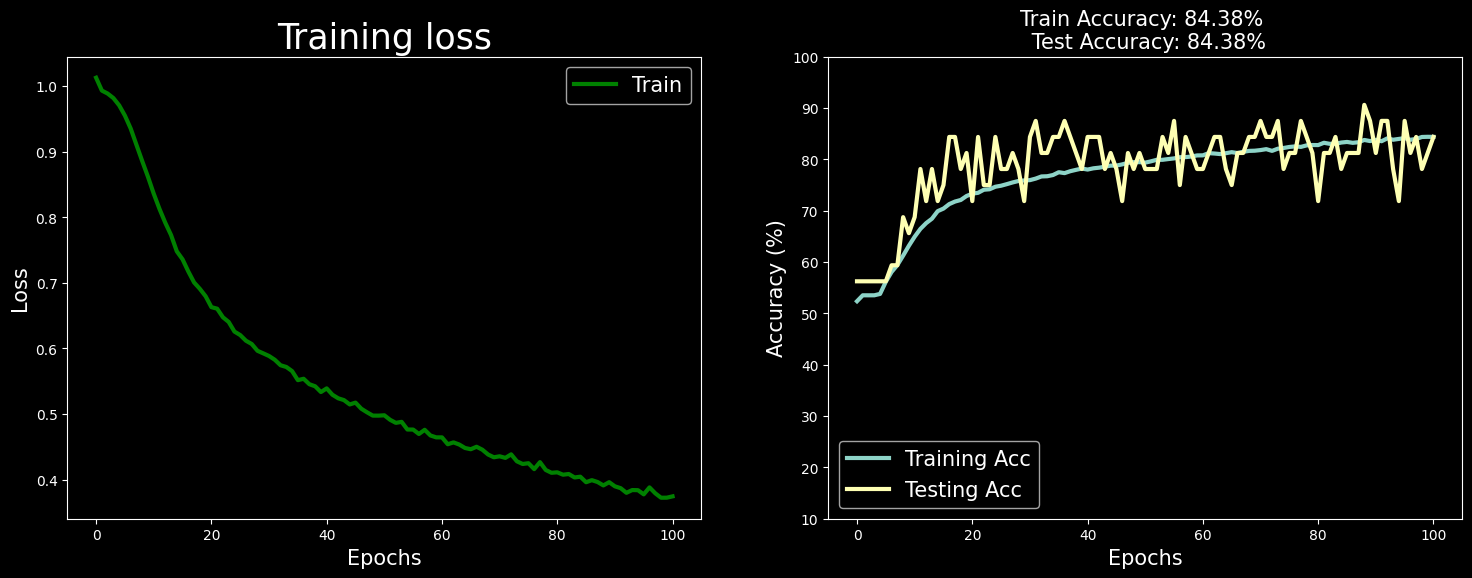

In [71]:
fig,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(losses,'g', lw = 3)
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].legend(['Train','Test'], fontsize = 15)
ax[0].set_title('Training loss', fontsize = 25)

ax[1].plot(trainAcc,label='Training Acc', lw =3)
ax[1].plot(testAcc,label='Testing Acc', lw = 3)
ax[1].set_xlabel('Epochs', fontsize = 15)
ax[1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1].set_ylim([10,100])
ax[1].set_title(f'Train Accuracy: {trainAcc[-1]:.2f}% \n Test Accuracy: {testAcc[-1]:.2f}%', fontsize = 15)
ax[1].legend(fontsize = 15)

plt.show()